<a href="https://colab.research.google.com/github/windyfebbi/sql-wrangling/blob/main/olist_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SQL & DATA WRANGLING: OLIST E-COMMERCE PRODUCT ANALYSIS**
Created By: **Windy Febbiayuni**

In [ ]:
# import library needed
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# connect to database using google drive
from google.colab import drive
drive.mount('/content/drive')
con = sqlite3.connect("/content/drive/My Drive/Data/olist.db")

# create cursor
cur = con.cursor()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **DATA PRE-PROCESSING**

In [ ]:
# show table list name from database
table_list = "SELECT name FROM sqlite_master WHERE type = 'table';"
data = pd.read_sql(table_list, con)
data

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [ ]:
# data exploration: customer table
cust = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
cust.info()
cust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# data exploration: orders table where order is valid
orders = pd.read_sql_query("SELECT * FROM olist_order_dataset where order_status <> 'canceled'", con)
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          98816 non-null  int64 
 1   order_id                       98816 non-null  object
 2   customer_id                    98816 non-null  object
 3   order_status                   98816 non-null  object
 4   order_purchase_timestamp       98816 non-null  object
 5   order_approved_at              98797 non-null  object
 6   order_delivered_carrier_date   97583 non-null  object
 7   order_delivered_customer_date  96470 non-null  object
 8   order_estimated_delivery_date  98816 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.8+ MB


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# rename column
orders.rename({'order_purchase_timestamp':'order_date'}, axis = 1, inplace = True)

# apply the function to_datetime to parse the order date column to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['month_purchase'] = orders['order_date'].dt.strftime('%Y-%m')
orders['hour'] = orders['order_date'].dt.hour
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          98816 non-null  int64         
 1   order_id                       98816 non-null  object        
 2   customer_id                    98816 non-null  object        
 3   order_status                   98816 non-null  object        
 4   order_date                     98816 non-null  datetime64[ns]
 5   order_approved_at              98797 non-null  object        
 6   order_delivered_carrier_date   97583 non-null  object        
 7   order_delivered_customer_date  96470 non-null  object        
 8   order_estimated_delivery_date  98816 non-null  object        
 9   month_purchase                 98816 non-null  object        
 10  hour                           98816 non-null  int64         
dtypes: datetime64[n

,index,order_id,customer_id,order_status,order_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_purchase,hour
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,10
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,20
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,8
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,19
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,21


In [ ]:
# data exploration: items table
items = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
items.info()
items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# data exploration: products table
products = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# data exploration: product category table
category = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)
category.info()
category.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          71 non-null     int64 
 1   product_category_name          71 non-null     object
 2   product_category_name_english  71 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [ ]:
# remove unused column for analysis
cust = cust.drop(['customer_unique_id', 'customer_zip_code_prefix', 'index'], axis = 1)

orders = orders.drop(['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'index'], axis = 1)

items = items.drop(['seller_id', 'shipping_limit_date', 'index'], axis = 1)

products = products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm', 'index'], axis = 1)

## **CLEANING DATA** ##

In [ ]:
# check null values orders table
orders.isna().sum().sort_values(ascending = False)

order_id          0
customer_id       0
order_date        0
month_purchase    0
hour              0
dtype: int64

In [ ]:
# check null values customers table
cust.isna().sum().sort_values(ascending = False)

customer_id       0
customer_city     0
customer_state    0
dtype: int64

In [ ]:
# check null values items table
items.isna().sum().sort_values(ascending = False)

order_id         0
order_item_id    0
product_id       0
price            0
freight_value    0
dtype: int64

In [ ]:
# check null values products table
products.isna().sum().sort_values(ascending = False)

product_category_name    610
product_id                 0
dtype: int64

In [ ]:
# check unique data of products category name from products table
products["product_category_name"].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', None,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
  

In [ ]:
# check null values category table
category.isna().sum().sort_values(ascending = False)

index                            0
product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
# check duplicate customers table
cust.duplicated().sum()

0

In [ ]:
# check duplicate orders table
orders.duplicated().sum()

0

In [ ]:
# check duplicate items table
items.duplicated().sum()

0

In [ ]:
# check duplicate products table
products.duplicated().sum()

0

In [ ]:
# check duplicate category table
category.duplicated().sum()

0

From cleaning processing can be known that, there's still missing/null values in products category name column, products table. But there's no duplicate data from five table that we'll use. To solve the missing values, we need to identify the unique data. Because products category name in products table is spelling in Portuguese, so we'll find out using category table cause it's also exist there and have the english name

In [ ]:
# check unique data of products category name from category table
category["product_category_name_english"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

From unique result, there's still have inconsistent values like misplling etc. To resolve that we'll do cleaning data and replace the inconsistent to consistent values.

In [ ]:
# replace inconsistent values: mispelling etc
mispell = {"home_confort": "home_comfort", "home_comfort_2": "home_comfort", "home_appliances_2":"home_appliances"}
category = category.replace(mispell)

category["product_category_name_english"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_comfort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

To easily do analysis, we'll merge the tables we'll use

In [ ]:
# merge tables items with products
olist = pd.merge(items, products, how="left", on="product_id")
olist = pd.merge(olist, category, how="left", on="product_category_name")
olist = pd.merge(olist, orders, how='inner', on='order_id')
olist = pd.merge(olist, cust, how='left', on='customer_id')

olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112108 entries, 0 to 112107
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112108 non-null  object        
 1   order_item_id                  112108 non-null  int64         
 2   product_id                     112108 non-null  object        
 3   price                          112108 non-null  float64       
 4   freight_value                  112108 non-null  float64       
 5   product_category_name          110519 non-null  object        
 6   index                          110497 non-null  float64       
 7   product_category_name_english  110497 non-null  object        
 8   customer_id                    112108 non-null  object        
 9   order_date                     112108 non-null  datetime64[ns]
 10  month_purchase                 112108 non-null  object        
 11  

In [ ]:
# check category product name in Portuguese which not exist in english name
olist[["product_category_name","product_category_name_english"]].loc[(olist["product_category_name"].notna()) & (olist["product_category_name_english"].isna())]

,product_category_name,product_category_name_english
3208,portateis_cozinha_e_preparadores_de_alimentos,NaN
12903,pc_gamer,NaN
12904,pc_gamer,NaN
19595,portateis_cozinha_e_preparadores_de_alimentos,NaN
31646,pc_gamer,NaN
32723,pc_gamer,NaN
36800,portateis_cozinha_e_preparadores_de_alimentos,NaN
36903,portateis_cozinha_e_preparadores_de_alimentos,NaN
45541,portateis_cozinha_e_preparadores_de_alimentos,NaN
55851,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [ ]:
# fill the null values in english name
fill = {"pc_gamer":"pc_gamer", "portateis_cozinha_e_preparadores_de_alimentos":"kitchen_and_food_preparators_portables", None:"others"}
olist["product_category_name_english"] = olist["product_category_name_english"].fillna(olist["product_category_name"].map(fill))

In [ ]:
# check again category product name after fill the null values
olist[["product_category_name","product_category_name_english"]].loc[(olist["product_category_name"].notna()) & (olist["product_category_name_english"].isna())]

,product_category_name,product_category_name_english


In [ ]:
# because the product category name english already clean, we'll remove the category name with the portuguese name
olist = olist.drop(['product_category_name', 'index'], axis = 1)
olist.columns

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'product_category_name_english', 'customer_id', 'order_date',
       'month_purchase', 'hour', 'customer_city', 'customer_state'],
      dtype='object')

In [ ]:
# check outliers
olist.describe()

,order_item_id,price,freight_value,hour
count,112108.000000,112108.000000,112108.000000,112108.000000
mean,1.197345,120.387559,19.991964,14.751017
std,0.704291,182.661658,15.797391,5.313082
min,1.000000,0.850000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,11.000000
50%,1.000000,74.940000,16.270000,15.000000
75%,1.000000,134.900000,21.150000,19.000000
max,21.000000,6735.000000,409.680000,23.000000


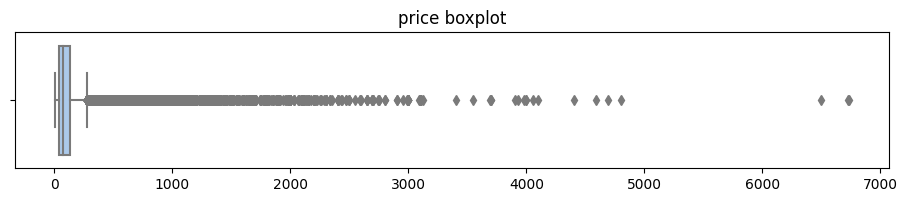

In [ ]:
# check the outlier from boxplot
columns = ['price']
n = 1

plt.figure(figsize=(10,7))

for x in columns:
    plt.subplot(3,1,n)
    sns.boxplot(data= olist, x=x ,palette='pastel')
    plt.xlabel(None)
    plt.title(f'{x} boxplot')
    n += 1

plt.tight_layout(pad=4)
plt.show()

## **EXPLORATORY DATA ANALYSIS (EDA)**


# 1. Top 10 Product with the Highest and Lowest Sales

Product health_beauty is the best-selling product that contribute $1255695


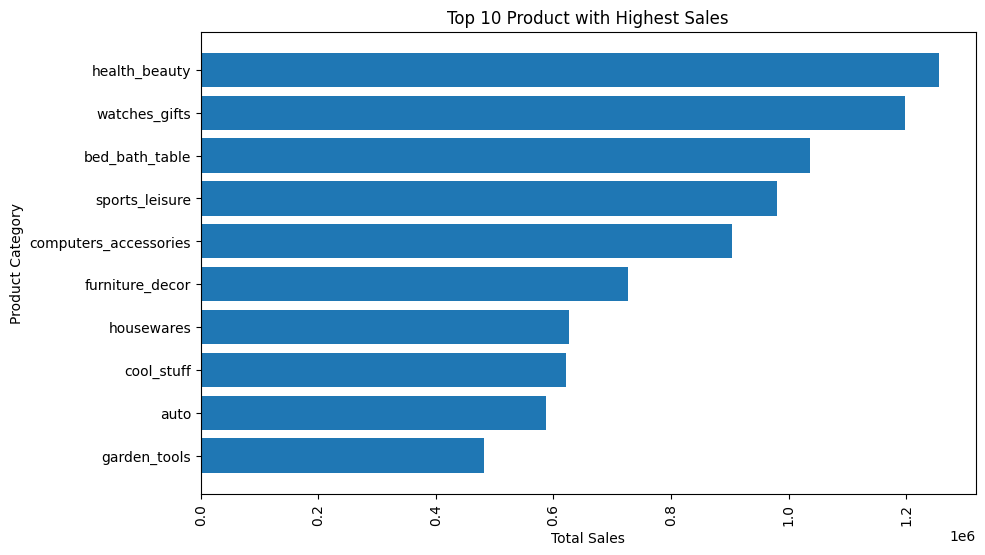

In [ ]:
# Product with the highest sales
highest_product = olist.rename({"product_category_name_english":"product_category", "price":"sales"}, axis=1)
highest_product = highest_product[['product_category','sales']].groupby(['product_category']).sum().sort_values(by=['sales'], ascending=False).head(10)
highest_product = highest_product.reset_index()
highest_product = highest_product.iloc[::-1]
top_product = highest_product.loc[0,'product_category']
highest_sales = highest_product.loc[0,'sales']
print(f'Product {top_product} is the best-selling product that contribute ${highest_sales:.0f}')

plt.figure(figsize=(10,6))
plt.barh(highest_product['product_category'], highest_product['sales'])
plt.title('Top 10 Product with Highest Sales')
plt.ylabel('Product Category')
plt.xlabel('Total Sales')
plt.xticks(rotation = 90)
plt.show()

Product security_and_services is the product with lowest sales $283 so Olist Commerce need to find ways to increase it


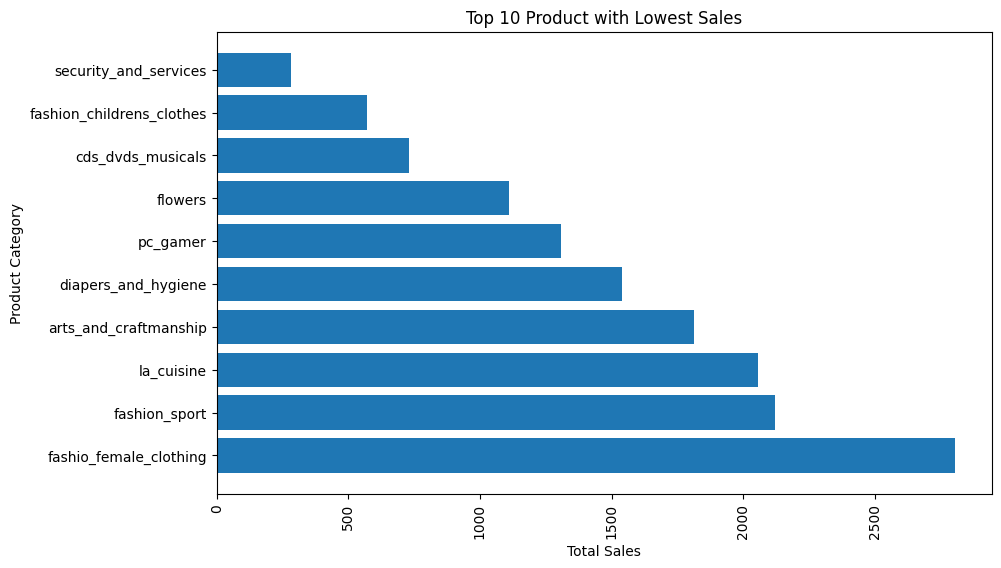

In [ ]:
# Product with the lowest sales
lowest_product = olist.rename({"product_category_name_english":"product_category", "price":"sales"}, axis=1)
lowest_product = lowest_product[['product_category','sales']].groupby(['product_category']).sum().sort_values(by=['sales'], ascending=True).head(10)
lowest_product = lowest_product.reset_index()
lowest_product = lowest_product.iloc[::-1]
low_sales = lowest_product.loc[0,'product_category']
lowest_sales = lowest_product.loc[0,'sales']
print(f'Product {low_sales} is the product with lowest sales ${lowest_sales:.0f} so Olist Commerce need to find ways to increase it')

plt.figure(figsize=(10,6))
plt.barh(lowest_product['product_category'], lowest_product['sales'])
plt.title('Top 10 Product with Lowest Sales')
plt.ylabel('Product Category')
plt.xlabel('Total Sales')
plt.xticks(rotation = 90)
plt.show()

# 2. Highest Product Sales Growth in Olist E-Commerce

In [ ]:
# Pivot table
olistrend = olist.rename({"product_category_name_english":"product_category"}, axis=1).reset_index()
olistrend = pd.merge(highest_product[["product_category"]], olistrend[["product_category", "order_item_id", "month_purchase"]],
                   on="product_category", how="left")
olistrend = pd.pivot_table(olistrend.reset_index(), columns="product_category", index="month_purchase", values="order_item_id", aggfunc="sum")
olistrend

product_category,auto,bed_bath_table,computers_accessories,cool_stuff,furniture_decor,garden_tools,health_beauty,housewares,sports_leisure,watches_gifts
month_purchase,,,,,,,,,,
2016-09,NaN,NaN,NaN,NaN,3.0,NaN,6.0,NaN,NaN,NaN
2016-10,10.0,16.0,27.0,8.0,101.0,5.0,50.0,16.0,17.0,5.0
2017-01,40.0,53.0,42.0,52.0,275.0,168.0,88.0,38.0,119.0,11.0
2017-02,95.0,190.0,118.0,71.0,325.0,86.0,180.0,103.0,174.0,39.0
2017-03,96.0,343.0,208.0,125.0,422.0,187.0,238.0,247.0,236.0,96.0
2017-04,99.0,321.0,157.0,123.0,244.0,131.0,201.0,251.0,234.0,113.0
2017-05,137.0,415.0,416.0,259.0,344.0,162.0,318.0,377.0,388.0,148.0
2017-06,120.0,447.0,325.0,205.0,326.0,129.0,289.0,387.0,310.0,129.0
2017-07,133.0,675.0,400.0,242.0,427.0,231.0,559.0,376.0,452.0,185.0


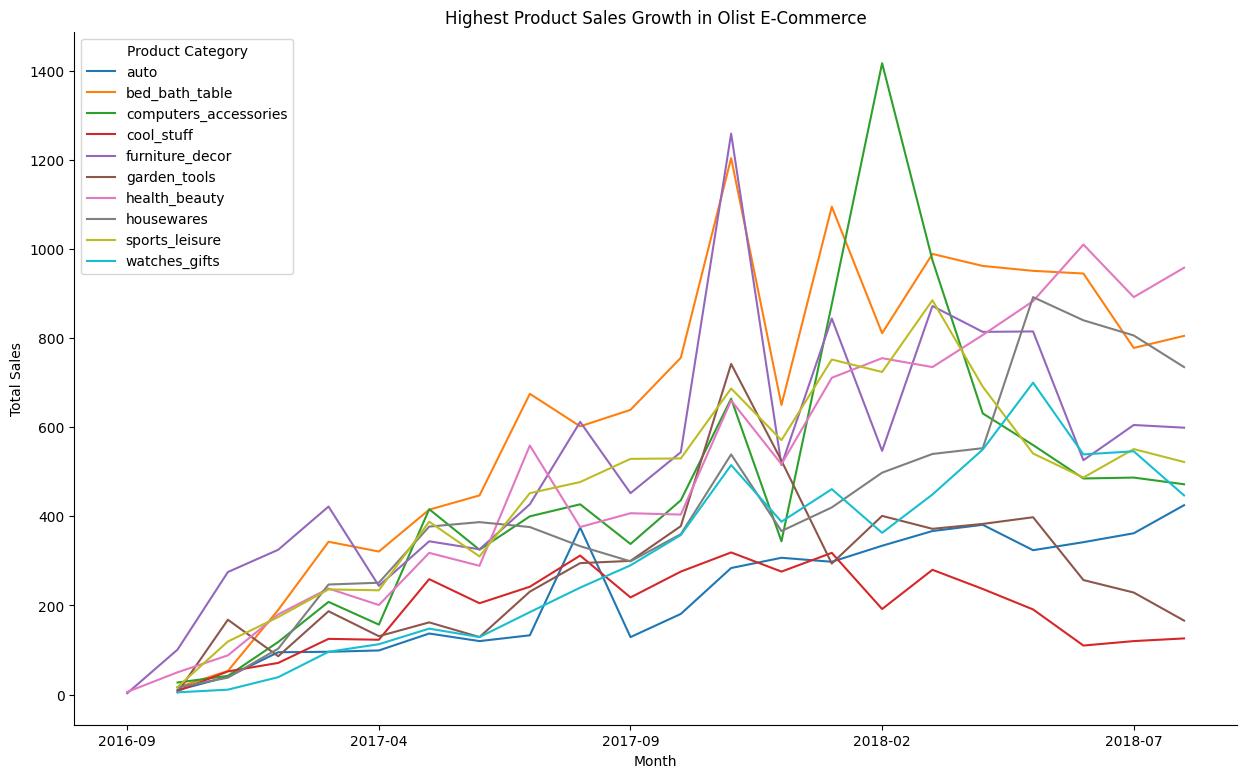

In [ ]:
# Line chart
ax = olistrend.plot(kind="line", title="Highest Product Sales Growth in Olist E-Commerce",
              xlabel="Month", ylabel="Total Sales", figsize=(15,9))

ax.legend(title="Product Category")

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# 3. Olist High Traffic Hours

hour
16    7615
14    7531
11    7398
13    7362
15    7341
Name: order_id, dtype: int64


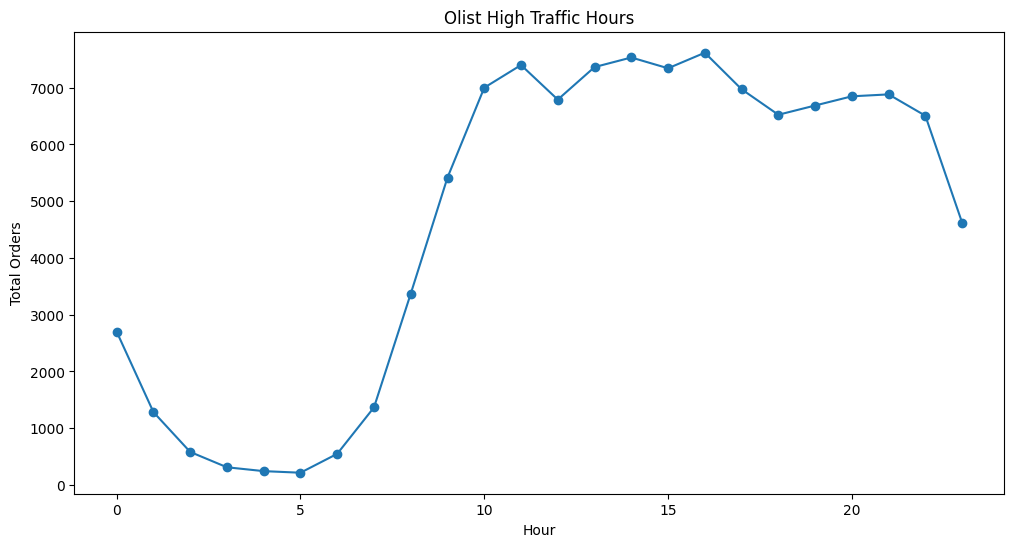

In [ ]:
# Best time to display product based on total order
hours = olist.groupby('hour')['order_id'].count()
print(hours.sort_values(ascending=False).head(5))

plt.figure(figsize=(12,6))
plt.plot(hours.index, hours.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Total Orders')
plt.title('Olist High Traffic Hours')
plt.show()

# 4. Cities with the Highest Number of Orders

sao paulo is the city with the highest number of orders with total 17673


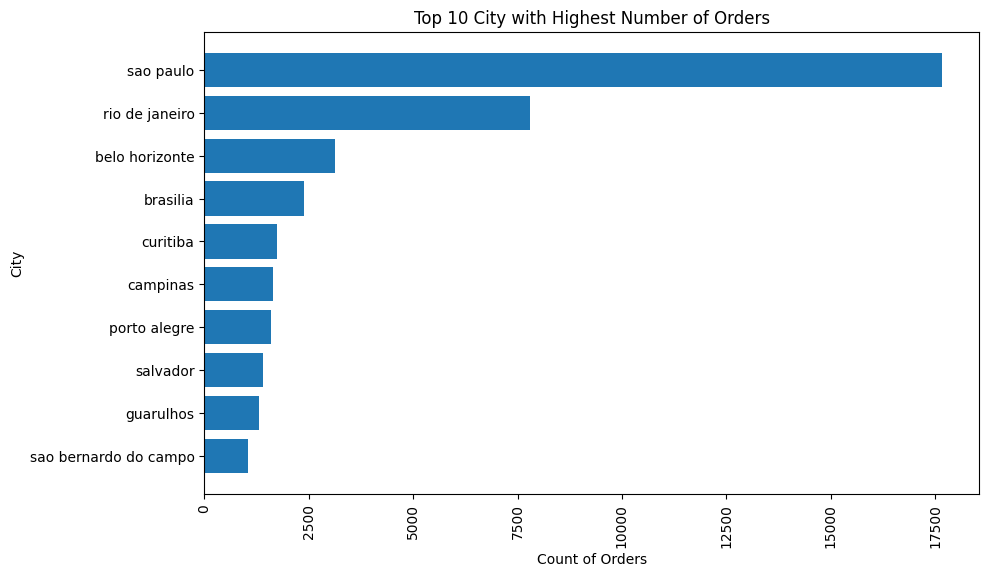

In [ ]:
# Top 10 city
top10_city = olist[['customer_city','order_id']].groupby(['customer_city']).count().sort_values(by=['order_id'], ascending=False).head(10)
top10_city = top10_city.reset_index()
top10_city = top10_city.iloc[::-1]
top_city = top10_city.loc[0,'customer_city']
highest_city = top10_city.loc[0,'order_id']
print(f'{top_city} is the city with the highest number of orders with total {highest_city}')

plt.figure(figsize=(10,6))
plt.barh(top10_city['customer_city'], top10_city['order_id'])
plt.title('Top 10 City with Highest Number of Orders')
plt.ylabel('City')
plt.xlabel('Count of Orders')
plt.xticks(rotation = 90)
plt.show()